🔄 Loading trained model...
✅ Model loaded successfully!
🖼️ Processing image...
🧩 Prediction: crack
📈 Confidence: 100.00%


C:\Users\moune\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.7.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


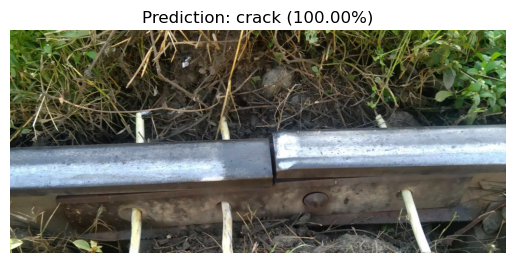

In [5]:
# ===============================================
# 🚆 RAILWAY CRACK DETECTION - MODEL TEST SCRIPT
# ===============================================

import cv2
import joblib
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
import os

# ================================
# 1️⃣ Load your saved model
# ================================
model_path = "best_crack_model_SVM.pkl"  # <-- Change if your model file name is different

print("🔄 Loading trained model...")
model = joblib.load(model_path)
print("✅ Model loaded successfully!")

# ================================
# 2️⃣ Define preprocessing + HOG function
# ================================
def preprocess_and_extract_hog(image_path):
    """Reads image, preprocesses, and extracts HOG features"""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"❌ Image not found at {image_path}")
    
    # Resize and normalize
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    
    # Extract HOG features
    features, _ = hog(img,
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      block_norm='L2-Hys',
                      visualize=True,
                      feature_vector=True)
    return features.reshape(1, -1)

# ================================
# 3️⃣ Load and preprocess sample image
# ================================
# ⚠️ FIX YOUR PATH HERE:
test_image_path = r"C:\Users\moune\MLM\My_train_model_v2\test\images\387463605_385533223827035_6813258457814046414_n_jpg.rf.2de70c11b3483180974a287d5fec0738.jpg"

if not os.path.exists(test_image_path):
    raise FileNotFoundError(f"Image path not found: {test_image_path}")

print("🖼️ Processing image...")
features = preprocess_and_extract_hog(test_image_path)

# ================================
# 4️⃣ Predict
# ================================
classes = ["crack", "no_crack"]
pred = model.predict(features)[0]
if hasattr(model, "predict_proba"):
    proba = model.predict_proba(features)[0][pred]
else:
    proba = 1.0  # if model doesn't support probabilities

# ================================
# 5️⃣ Display Results
# ================================
print("===================================")
print(f"🧩 Prediction: {classes[pred]}")
print(f"📈 Confidence: {proba * 100:.2f}%")
print("===================================")

# Display image with prediction
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {classes[pred]} ({proba * 100:.2f}%)")
plt.axis("off")
plt.show()


🖼️ Processing image...
🧩 Prediction: **no_crack**
📈 Confidence: **100.00%**


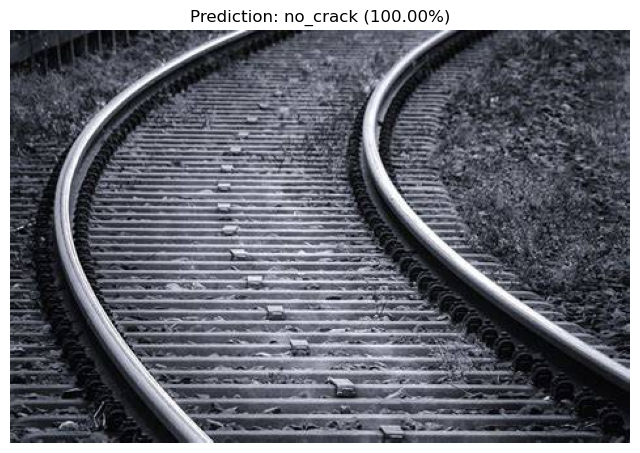

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# IMPORTANT: You must ensure 'model' and 'preprocess_and_extract_hog' are defined
# and loaded/imported before calling this function.

def predict_crack_on_image(test_image_path):
    """
    Loads an image, extracts HOG features, predicts the class (crack/no_crack) 
    using the model, and displays the result.

    Args:
        test_image_path (str): The file path to the image to be processed.

    Returns:
        tuple: A tuple containing the predicted class (str) and confidence (float).
    """
    # ================================
    # 1️⃣ Path Check
    # ================================
    if not os.path.exists(test_image_path):
        raise FileNotFoundError(f"Image path not found: {test_image_path}")

    # ================================
    # 2️⃣ Preprocess & Feature Extraction
    # ================================
    print("🖼️ Processing image...")
    # This function must be defined and available globally or passed as an argument.
    try:
        features = preprocess_and_extract_hog(test_image_path)
    except NameError:
        print("Error: 'preprocess_and_extract_hog' function is not defined.")
        return "Error", 0.0

    # ================================
    # 3️⃣ Setup & 4️⃣ Predict
    # ================================
    classes = ["crack", "no_crack"]
    
    # Check if 'model' is defined and has the 'predict' method
    if 'model' not in globals() or not hasattr(model, 'predict'):
        print("Error: 'model' object is not defined or lacks a 'predict' method.")
        return "Error", 0.0
        
    try:
        # Reshape features if necessary, e.g., features.reshape(1, -1)
        pred_index = model.predict(features)[0]
    except Exception as e:
        print(f"Error during model prediction: {e}")
        return "Error", 0.0

    if hasattr(model, "predict_proba"):
        # The probability of the *predicted* class
        proba = model.predict_proba(features)[0][pred_index]
    else:
        proba = 1.0  # Default confidence if model doesn't support probabilities

    predicted_class = classes[pred_index]
    confidence = proba * 100

    # ================================
    # 5️⃣ Display Results
    # ================================
    print("===================================")
    print(f"🧩 Prediction: **{predicted_class}**")
    print(f"📈 Confidence: **{confidence:.2f}%**")
    print("===================================")

    # Display image with prediction
    img = cv2.imread(test_image_path)
    if img is None:
        print(f"Error: Could not read image at {test_image_path}")
        return predicted_class, confidence
        
    # OpenCV reads as BGR, convert to RGB for Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()
    
    return predicted_class, confidence

# Example of how you would call the function:
result_class, result_conf = predict_crack_on_image(r"C:\Users\moune\MLM\My_train_model_v2\test\OIP.jpg")